# Analyse the results of pySCENIC workflow

This notebook closely follows the pyScenic implementation 
https://pyscenic.readthedocs.io/en/latest/tutorial.html#case-studies


1 - Gene Regulatory Network Inference (GRNboost2)

2 - Regulon Prediction (icisTarget/RcisTarget)

3 - Cellular Enrichment (AUC cell, pySCENIC)

4 - Binarize the AUC matrix (pySCENIC)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scanpy as sc
import anndata as ad
import matplotlib as mpl
import matplotlib.pyplot as plt
import loompy as lp

In [2]:
#open the file linking TF to the genes targeted
header_list = ['Regulon','Motif','AUC','NES','qval','Ortholog','Annotation','Context','TargetGenes','RankatMax']
tracks = pd.read_csv('SCENIC/Regulon_outs/both_lineages_reg_tracks.csv', names=header_list)
tracks = tracks[3:]
tracks

,Regulon,Motif,AUC,NES,qval,Ortholog,Annotation,Context,TargetGenes,RankatMax
3,ATF4,ENCFF484GNY,0.09925416942082695,6.094714969056329,0.0,1.0,ATF4 (K562),"frozenset({'weight>75.0%', 'activating', 'enco...","[('DDIT4', 71.53656804887673), ('TNFAIP8', 0.7...",898
4,ATF4,ENCFF560GZS,0.10207116829689092,6.394572067582182,0.0,1.0,ATF4 (K562),"frozenset({'weight>75.0%', 'activating', 'enco...","[('DDIT4', 71.53656804887673), ('TNFAIP8', 0.7...",879
5,ATF4,ENCFF742FPU,0.10487325294764749,6.692841612642737,0.0,1.0,ATF4 (K562),"frozenset({'weight>75.0%', 'activating', 'enco...","[('DDIT4', 71.53656804887673), ('SLC1A5', 85.2...",993
6,CEBPB,ENCFF306ITH,0.07416956368211908,3.8004168889519105,0.0,1.0,CEBPB (IMR-90),"frozenset({'weight>75.0%', 'activating', 'enco...","[('SLC43A3', 0.4142624648611908), ('CDKN1A', 0...",1027
7,CEBPB,ENCFF326HWU,0.06841382808886502,3.138049045625644,0.0,1.0,CEBPB (GM12878),"frozenset({'weight>75.0%', 'activating', 'enco...","[('NFKBIA', 27.470943462469855), ('NFE2L2', 4....",1064
...,...,...,...,...,...,...,...,...,...,...
1199,TFDP1,ENCFF317IYH,0.12331024161971359,4.6484038488789565,0.0,1.0,3xFLAG-TFDP1 (HepG2 genetically modified using...,"frozenset({'activating', 'encode_20190621__ChI...","[('RAD54L', 0.9374734615409628), ('BLM', 0.807...",1726
1200,TFDP1,ENCFF797HFR,0.11789747475508956,4.30070250863494,0.0,1.0,3xFLAG-TFDP1 (HepG2 genetically modified using...,"frozenset({'activating', 'encode_20190621__ChI...","[('RAD54L', 0.9374734615409628), ('FANCD2', 2....",2525
1201,ZNF213,ENCFF808RYL,0.12993021042613936,3.3141519128868144,0.0,1.0,eGFP-ZNF213 (HEK293 genetically modified using...,"frozenset({'activating', 'encode_20190621__ChI...","[('NOL6', 0.2128998481234354), ('GBA', 0.48751...",1194
1202,ZNF571,ENCFF722SNO,0.0760988333157097,4.019878132903921,0.0,1.0,eGFP-ZNF571 (HEK293 genetically modified using...,"frozenset({'activating', 'encode_20190621__ChI...","[('SBSN', 0.3957488621517256), ('ANK1', 1.0729...",1072


In [3]:
#collapse by regulon and then combine the target genes into one output
tf_gene = pd.DataFrame(tracks[['Regulon','TargetGenes']])
tf_gene

,Regulon,TargetGenes
3,ATF4,"[('DDIT4', 71.53656804887673), ('TNFAIP8', 0.7..."
4,ATF4,"[('DDIT4', 71.53656804887673), ('TNFAIP8', 0.7..."
5,ATF4,"[('DDIT4', 71.53656804887673), ('SLC1A5', 85.2..."
6,CEBPB,"[('SLC43A3', 0.4142624648611908), ('CDKN1A', 0..."
7,CEBPB,"[('NFKBIA', 27.470943462469855), ('NFE2L2', 4...."
...,...,...
1199,TFDP1,"[('RAD54L', 0.9374734615409628), ('BLM', 0.807..."
1200,TFDP1,"[('RAD54L', 0.9374734615409628), ('FANCD2', 2...."
1201,ZNF213,"[('NOL6', 0.2128998481234354), ('GBA', 0.48751..."
1202,ZNF571,"[('SBSN', 0.3957488621517256), ('ANK1', 1.0729..."


In [4]:
#combine the regulons into one output
#the results of column 2 are pasted together 
grouped_df = tf_gene.groupby("Regulon")
grouped_lists = grouped_df["TargetGenes"].agg(lambda column: "".join(column))
grouped_lists = grouped_lists.reset_index(name="TargetGenes")
grouped_lists

,Regulon,TargetGenes
0,ATF4,"[('DDIT4', 71.53656804887673), ('TNFAIP8', 0.7..."
1,BCL11A,"[('HESX1', 0.1053526937035626), ('MAP3K12', 0...."
2,BHLHE40,"[('PHRF1', 10.997121538988166), ('AKIRIN1', 12..."
3,CEBPB,"[('SLC43A3', 0.4142624648611908), ('CDKN1A', 0..."
4,CEBPG,"[('HSPA5', 1.6292552696199236), ('GOT1', 16.48..."
...,...,...
73,ZNF592,"[('WIPF2', 1.8871857634729727), ('RAPGEF1', 1...."
74,ZNF600,"[('OTUD7B', 0.7401921644439734), ('DPP9', 0.24..."
75,ZNF639,"[('MLLT10', 0.7797409987915126), ('ZDHHC5', 0...."
76,ZNF662,"[('SULT1A2', 0.0361967041267373), ('PERM1', 0...."


In [5]:
#Save to file to be able to open and print out the genes associated with each regulon
grouped_lists.to_csv('SCENIC/Regulon_outs/transcription_factor_to_target_genes.csv', index=None)

now can begin pyscenic analysis

In [6]:
#import the results from the binarized AUC function
bin_mtx = pd.read_csv('SCENIC/Regulon_outs/VSMC_2_lineages_binarized_matrix_regulons.csv', index_col=0)
thresholds = pd.read_csv('SCENIC/Regulon_outs/VSMC_2_lineages_thresholds_AUC_cell_regulons.csv', index_col=0).threshold

In [7]:
bin_mtx

,ATF4(+),BCL11A(+),BHLHE40(+),CEBPB(+),CEBPG(+),CREB3(+),CREB3L1(+),E2F1(+),E2F4(+),E2F7(+),...,ZNF544(+),ZNF558(+),ZNF560(+),ZNF571(+),ZNF585B(+),ZNF592(+),ZNF600(+),ZNF639(+),ZNF662(+),ZNF792(+)
P1_Coronary-AAACCCAAGTCTAGAA,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P1_Coronary-AAACCCACAGCACCCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
P1_Coronary-AAACCCAGTTCCGCTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
P1_Coronary-AAACGAAAGAAAGCGA,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
P1_Coronary-AAACGAAAGGTGGGTT,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P2_Pulmonary-TTTACTGGTAGTCCTA,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P3_Coronary-AATGGAAAGCACTAAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
P3_Coronary-ACCCTCATCAAGAGTA,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
P3_Coronary-GTCTTTAAGCCTCACG,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [8]:
#Read the barcodes from the binarized matrix into a list
list_barcodes = list(bin_mtx.index.values)

In [11]:
#Import the original data file 
#the one with all the additional metadata for lineage absorption etc
adata = sc.read_h5ad('VSMC/PC_Output_2lineages/PC_miQC_subtypes_Depleted_VSMC_all_patients.h5ad')
adata.obs

,n_genes,n_counts,percent_mito,Channel,scale,louvain_labels,Tissue,doublet_score,pred_dbl,splice,value
barcodekey,,,,,,,,,,,
P1_Coronary-AAACCCAAGTCTAGAA,4828,17632,0.051044,P1_Coronary,5.671506,1,Coronary,0.000750,False,Yes,0
P1_Coronary-AAACCCACAGCACCCA,6988,35851,0.030683,P1_Coronary,2.789400,2,Coronary,0.001998,False,Yes,0
P1_Coronary-AAACCCAGTTCCGCTT,4152,12666,0.023685,P1_Coronary,7.895152,1,Coronary,0.001813,False,Yes,0
P1_Coronary-AAACGAAAGAAAGCGA,5104,19971,0.035051,P1_Coronary,5.007261,2,Coronary,0.001654,False,Yes,0
P1_Coronary-AAACGAAAGGTGGGTT,3651,10990,0.018198,P1_Coronary,9.099181,1,Coronary,0.001102,False,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...
P4_Pulmonary-TTTGGAGTCCGTTGGG,5812,30111,0.006642,P4_Pulmonary,3.321156,2,Pulmonary,0.000981,False,Yes,0
P4_Pulmonary-TTTGGTTAGACTTCGT,6495,41431,0.002414,P4_Pulmonary,2.413710,3,Pulmonary,0.000703,False,Yes,0
P4_Pulmonary-TTTGTTGAGCATCAAA,6244,29012,0.024128,P4_Pulmonary,3.446850,2,Pulmonary,0.000926,False,Yes,0


In [12]:
#Splice the scanpy anndata object so only the cells identified above are located therein
adata = adata[adata.obs.index.isin(list_barcodes),:]
adata

View of AnnData object with n_obs × n_vars = 10000 × 16178
    obs: 'n_genes', 'n_counts', 'percent_mito', 'Channel', 'scale', 'louvain_labels', 'Tissue', 'doublet_score', 'pred_dbl', 'splice', 'value'
    var: 'featureid', 'n_cells', 'percent_cells', 'robust', 'highly_variable_features', 'mean', 'var', 'hvf_loess', 'hvf_rank'
    uns: 'PCs', '_attr2type', 'diffmap_evals', 'genome', 'louvain_labels_colors', 'louvain_resolution', 'modality', 'ncells', 'norm_count', 'pca', 'pca_features', 'stdzn_max_value', 'stdzn_mean', 'stdzn_std'
    obsm: 'X_diffmap', 'X_fle', 'X_pca', 'X_pca_harmony', 'X_phi', 'X_umap', 'diffmap_knn_distances', 'diffmap_knn_indices', 'pca_harmony_knn_distances', 'pca_harmony_knn_indices'
    varm: 'means', 'partial_sum'
    obsp: 'W_diffmap', 'W_pca_harmony'

In [13]:
adata.obs

,n_genes,n_counts,percent_mito,Channel,scale,louvain_labels,Tissue,doublet_score,pred_dbl,splice,value
barcodekey,,,,,,,,,,,
P1_Coronary-AAACCCAAGTCTAGAA,4828,17632,0.051044,P1_Coronary,5.671506,1,Coronary,0.000750,False,Yes,0
P1_Coronary-AAACCCACAGCACCCA,6988,35851,0.030683,P1_Coronary,2.789400,2,Coronary,0.001998,False,Yes,0
P1_Coronary-AAACCCAGTTCCGCTT,4152,12666,0.023685,P1_Coronary,7.895152,1,Coronary,0.001813,False,Yes,0
P1_Coronary-AAACGAAAGAAAGCGA,5104,19971,0.035051,P1_Coronary,5.007261,2,Coronary,0.001654,False,Yes,0
P1_Coronary-AAACGAAAGGTGGGTT,3651,10990,0.018198,P1_Coronary,9.099181,1,Coronary,0.001102,False,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...
P2_Pulmonary-TTTACTGGTAGTCCTA,4168,11458,0.008728,P2_Pulmonary,8.728288,1,Pulmonary,0.000582,False,Yes,0
P3_Coronary-AATGGAAAGCACTAAA,2463,7554,0.000000,P3_Coronary,13.238020,1,Coronary,0.000905,False,Yes,0
P3_Coronary-ACCCTCATCAAGAGTA,3988,18036,0.066534,P3_Coronary,5.544467,1,Coronary,0.000339,False,Yes,0


In [14]:
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

In [15]:
df_metadata = pd.DataFrame(adata.obs)
df_metadata

,n_genes,n_counts,percent_mito,Channel,scale,louvain_labels,Tissue,doublet_score,pred_dbl,splice,value
barcodekey,,,,,,,,,,,
P1_Coronary-AAACCCAAGTCTAGAA,4828,17632,0.051044,P1_Coronary,5.671506,1,Coronary,0.000750,False,Yes,0
P1_Coronary-AAACCCACAGCACCCA,6988,35851,0.030683,P1_Coronary,2.789400,2,Coronary,0.001998,False,Yes,0
P1_Coronary-AAACCCAGTTCCGCTT,4152,12666,0.023685,P1_Coronary,7.895152,1,Coronary,0.001813,False,Yes,0
P1_Coronary-AAACGAAAGAAAGCGA,5104,19971,0.035051,P1_Coronary,5.007261,2,Coronary,0.001654,False,Yes,0
P1_Coronary-AAACGAAAGGTGGGTT,3651,10990,0.018198,P1_Coronary,9.099181,1,Coronary,0.001102,False,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...
P2_Pulmonary-TTTACTGGTAGTCCTA,4168,11458,0.008728,P2_Pulmonary,8.728288,1,Pulmonary,0.000582,False,Yes,0
P3_Coronary-AATGGAAAGCACTAAA,2463,7554,0.000000,P3_Coronary,13.238020,1,Coronary,0.000905,False,Yes,0
P3_Coronary-ACCCTCATCAAGAGTA,3988,18036,0.066534,P3_Coronary,5.544467,1,Coronary,0.000339,False,Yes,0


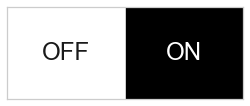

In [20]:
bw_palette = sns.xkcd_palette(["white", "black"])
sns.set()
sns.set(font_scale=2)
sns.set_style("whitegrid")
fig = palplot(bw_palette, ['OFF', 'ON'], ['k', 'w'], size=2.0)
fig.tight_layout()
fig.savefig('SCENIC/figures/on_off_legend.png', dpi=100)


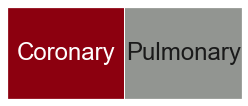

In [19]:
gr_palette = sns.xkcd_palette(["crimson", "grey"])
sns.set()
sns.set(font_scale=2)
fig = palplot(gr_palette, adata.obs.Tissue.dtype.categories, ['w', 'k'], size=2.0)
fig.tight_layout()
fig.savefig('SCENIC/figures/Tissue_legend.png', dpi=100)

In [21]:
#this is necessary to iterate over the colors of each cell
cell_type_color_lut = dict(zip(adata.obs.Tissue.dtype.categories, gr_palette))
cell_id2cell_type_lut = df_metadata.Tissue.to_dict()
bw_palette = sns.xkcd_palette(["white", "black"])

In [22]:
#import the aucell output
#convert from loom into dataframe
lf = lp.connect('SCENIC/Regulon_outs/both_lineages_pyscenic_binary_output_tracks.loom', mode='r+', validate=False)
auc_mtx = pd.DataFrame(lf.ca.RegulonsAUC, index=lf.ca.CellID)
lf.close()
auc_mtx

,ATF4(+),BCL11A(+),BHLHE40(+),CEBPB(+),CEBPG(+),CREB3(+),CREB3L1(+),E2F1(+),E2F4(+),E2F7(+),...,ZNF544(+),ZNF558(+),ZNF560(+),ZNF571(+),ZNF585B(+),ZNF592(+),ZNF600(+),ZNF639(+),ZNF662(+),ZNF792(+)
P1_Coronary-AAACCCAAGTCTAGAA,0.052884,0.0,0.0,0.059564,0.051191,0.071075,0.160053,0.019051,0.040326,0.016165,...,0.061139,0.0,0.0,0.0,0.0,0.000000,0.072739,0.000000,0.0,0.0
P1_Coronary-AAACCCACAGCACCCA,0.063890,0.0,0.0,0.063794,0.058637,0.048561,0.121308,0.029352,0.056047,0.023276,...,0.067510,0.0,0.0,0.0,0.0,0.027400,0.119236,0.000000,0.0,0.0
P1_Coronary-AAACCCAGTTCCGCTT,0.056276,0.0,0.0,0.061634,0.059239,0.000000,0.099442,0.018015,0.046900,0.020704,...,0.068841,0.0,0.0,0.0,0.0,0.000343,0.100789,0.000000,0.0,0.0
P1_Coronary-AAACGAAAGAAAGCGA,0.088876,0.0,0.0,0.071747,0.083202,0.037259,0.172329,0.037545,0.055561,0.029688,...,0.067510,0.0,0.0,0.0,0.0,0.002610,0.112865,0.000000,0.0,0.0
P1_Coronary-AAACGAAAGGTGGGTT,0.053449,0.0,0.0,0.063450,0.053883,0.075931,0.110098,0.027686,0.052490,0.019172,...,0.072169,0.0,0.0,0.0,0.0,0.000000,0.051155,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P2_Pulmonary-TTTACTGGTAGTCCTA,0.083509,0.0,0.0,0.095051,0.056214,0.120078,0.093346,0.010047,0.031313,0.015358,...,0.052772,0.0,0.0,0.0,0.0,0.007554,0.036512,0.000190,0.0,0.0
P3_Coronary-AATGGAAAGCACTAAA,0.078936,0.0,0.0,0.073882,0.056159,0.046618,0.099356,0.012592,0.040598,0.012862,...,0.000000,0.0,0.0,0.0,0.0,0.047452,0.089569,0.000000,0.0,0.0
P3_Coronary-ACCCTCATCAAGAGTA,0.069008,0.0,0.0,0.051577,0.050344,0.037966,0.256724,0.011103,0.028933,0.018757,...,0.037463,0.0,0.0,0.0,0.0,0.000000,0.092992,0.006624,0.0,0.0
P3_Coronary-GTCTTTAAGCCTCACG,0.069344,0.0,0.0,0.061110,0.046340,0.008918,0.214825,0.014788,0.018696,0.018672,...,0.031378,0.0,0.0,0.0,0.0,0.112485,0.153181,0.000507,0.0,0.0


/Users/jbezney/opt/anaconda3/envs/pegasus2/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


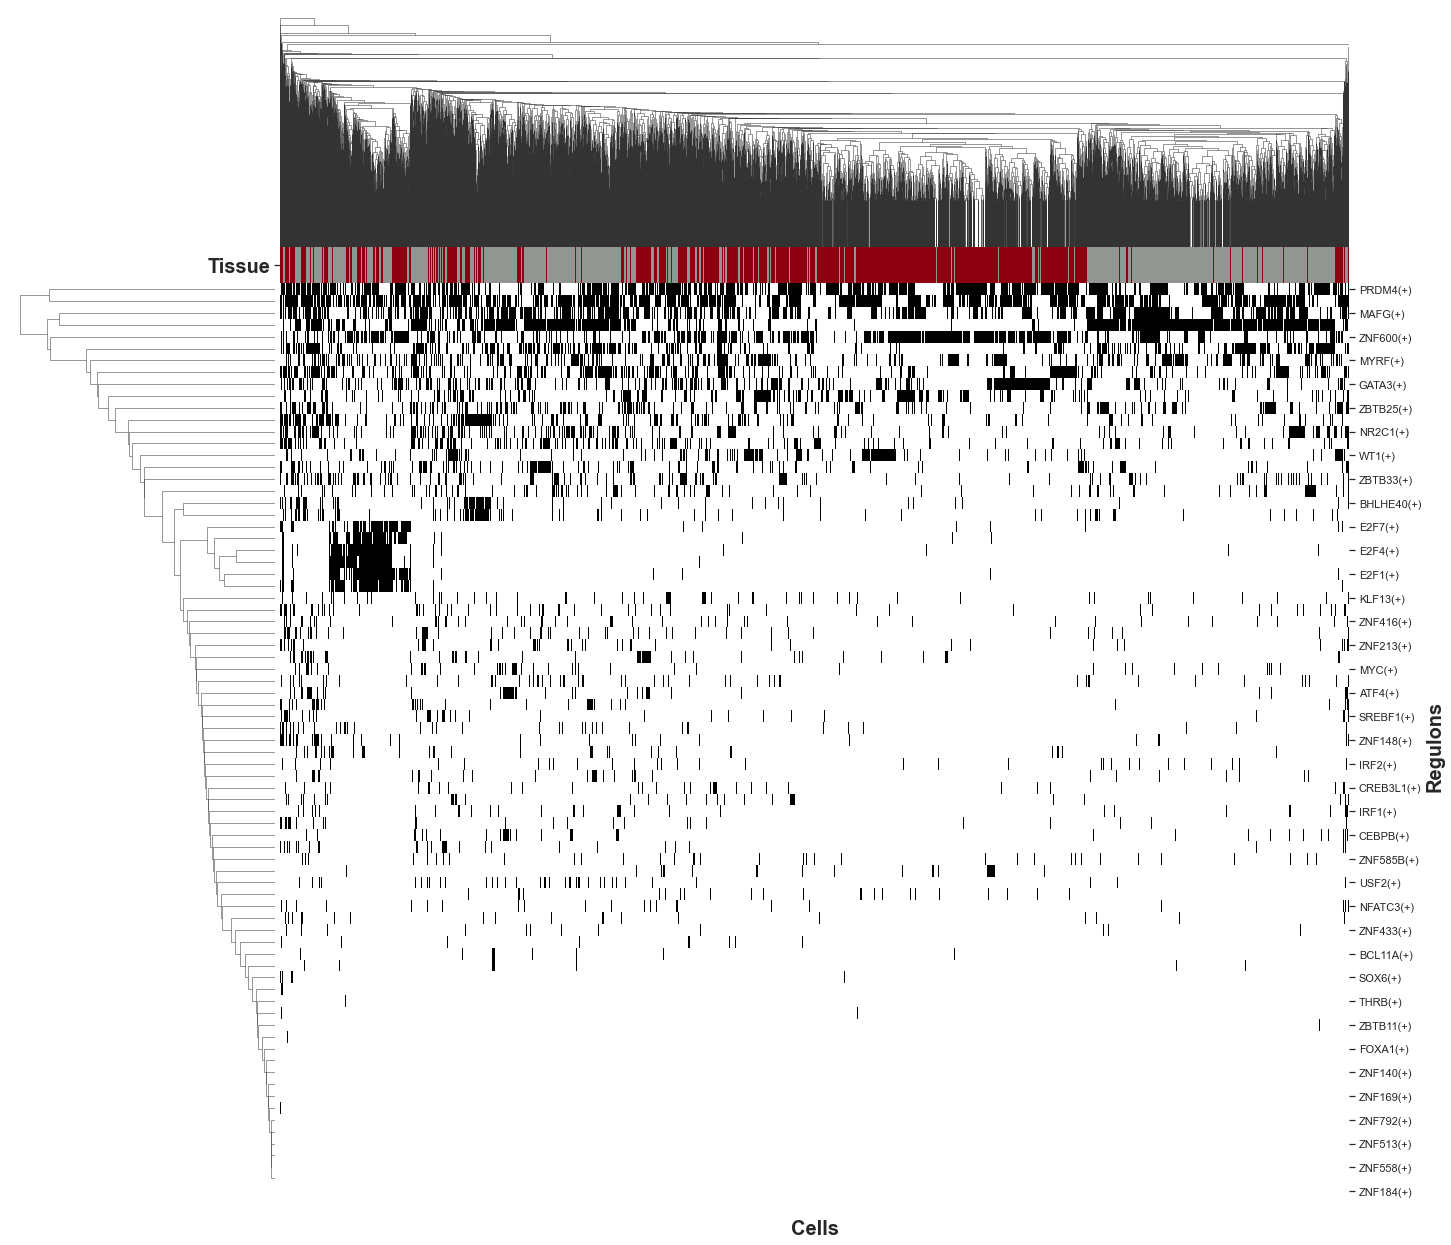

In [23]:
sns.set()
sns.set(font_scale=1.0)
sns.set_style("ticks", {"xtick.minor.size": 1, "ytick.minor.size": 0.1})
g = sns.clustermap(bin_mtx.T, 
               col_colors=auc_mtx.index.map(cell_id2cell_type_lut).map(cell_type_color_lut),
               cmap=bw_palette, figsize=(20,20))
g.ax_heatmap.set_xticklabels([])
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_xlabel('Cells', fontsize=20, weight='bold')
g.ax_heatmap.set_ylabel('Regulons', fontsize=20, weight='bold')
g.ax_col_colors.set_yticks([0.5])
g.ax_col_colors.set_yticklabels(['Tissue'], fontsize=20, weight='bold')
g.cax.set_visible(False)
#g.fig.savefig('SCENIC/figures/clustermap_all_cells_tissue.png', dpi=300)


now that we have the full regulon matrix


now we need to begin to seperate into the main differences between coronary and pulmonary


and seperate according to pseudotime and lineage differences 


In [24]:
#first we need to prioriize in order to find the largest differences between regulons 
bin_mtx

,ATF4(+),BCL11A(+),BHLHE40(+),CEBPB(+),CEBPG(+),CREB3(+),CREB3L1(+),E2F1(+),E2F4(+),E2F7(+),...,ZNF544(+),ZNF558(+),ZNF560(+),ZNF571(+),ZNF585B(+),ZNF592(+),ZNF600(+),ZNF639(+),ZNF662(+),ZNF792(+)
P1_Coronary-AAACCCAAGTCTAGAA,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P1_Coronary-AAACCCACAGCACCCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
P1_Coronary-AAACCCAGTTCCGCTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
P1_Coronary-AAACGAAAGAAAGCGA,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
P1_Coronary-AAACGAAAGGTGGGTT,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P2_Pulmonary-TTTACTGGTAGTCCTA,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P3_Coronary-AATGGAAAGCACTAAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
P3_Coronary-ACCCTCATCAAGAGTA,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
P3_Coronary-GTCTTTAAGCCTCACG,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [25]:
#list of all barcodes of all cells
print(len(list_barcodes))

10000


In [26]:
#generate list of barcodes only corresponding with each tissue type
p_barcodes = [x for x in list_barcodes if x.startswith(tuple(['P1_P','P2_P','P3_P','P4_P']))]
print(len(p_barcodes))

5002


In [27]:
c_barcodes = [x for x in list_barcodes if x.startswith(tuple(['P1_C','P2_C','P3_C','P4_C']))]
print(len(c_barcodes))

4998


In [28]:
#split bin_mtx into those corresponding with coronary and those with pulmonary
#add a new column with the average of the regulons
p_df = bin_mtx[bin_mtx.index.isin(p_barcodes)]
p_df = p_df.T
p_df['average'] = p_df.mean(axis=1)
p_df['average']

ATF4(+)       0.052379
BCL11A(+)     0.011995
BHLHE40(+)    0.057577
CEBPB(+)      0.057777
CEBPG(+)      0.007997
                ...   
ZNF592(+)     0.581767
ZNF600(+)     0.283886
ZNF639(+)     0.062175
ZNF662(+)     0.000200
ZNF792(+)     0.000000
Name: average, Length: 78, dtype: float64

In [29]:
c_df = bin_mtx[bin_mtx.index.isin(c_barcodes)]
c_df = c_df.T
c_df['average'] = c_df.mean(axis=1)
c_df['average']

ATF4(+)       0.023009
BCL11A(+)     0.002401
BHLHE40(+)    0.069028
CEBPB(+)      0.000000
CEBPG(+)      0.078031
                ...   
ZNF592(+)     0.630452
ZNF600(+)     0.596439
ZNF639(+)     0.046619
ZNF662(+)     0.000000
ZNF792(+)     0.000200
Name: average, Length: 78, dtype: float64

In [30]:
#create a new dataframe with these two columns of averages
merged = pd.DataFrame()
merged['pulmonary'] = p_df['average']
merged['coronary'] = c_df['average']
merged

,pulmonary,coronary
ATF4(+),0.052379,0.023009
BCL11A(+),0.011995,0.002401
BHLHE40(+),0.057577,0.069028
CEBPB(+),0.057777,0.000000
CEBPG(+),0.007997,0.078031
...,...,...
ZNF592(+),0.581767,0.630452
ZNF600(+),0.283886,0.596439
ZNF639(+),0.062175,0.046619
ZNF662(+),0.000200,0.000000


In [31]:
#subtract, take the absolute value, and rank according to largest difference
merged['difference']= abs(merged['pulmonary']-merged['coronary'])
merged = merged.sort_values(by='difference', ascending=False)
merged

,pulmonary,coronary,difference
NFE2L2(+),0.907237,0.009404,0.897833
JUND(+),0.465614,0.136855,0.328759
ZNF600(+),0.283886,0.596439,0.312552
WT1(+),0.014994,0.266707,0.251713
CREB3(+),0.104558,0.344338,0.239780
...,...,...,...
ZNF571(+),0.002399,0.002201,0.000198
ZNF184(+),0.000000,0.000000,0.000000
ZNF521(+),0.000000,0.000000,0.000000
ZNF195(+),0.000000,0.000000,0.000000


In [32]:
#name of the top 5 regulons 
top_regulons = merged.head(7)
top_regulons = list(top_regulons.index.values)
top_regulons

['NFE2L2(+)',
 'JUND(+)',
 'ZNF600(+)',
 'WT1(+)',
 'CREB3(+)',
 'GATA3(+)',
 'PRDM4(+)']

In [30]:
#now we need to create a subset of the bin_mtx
#and a subset of the auc_mtx
#such that only the top 5 regulons are expressed

In [33]:
sbin_mtx = bin_mtx[top_regulons]
sbin_mtx

,NFE2L2(+),JUND(+),ZNF600(+),WT1(+),CREB3(+),GATA3(+),PRDM4(+)
P1_Coronary-AAACCCAAGTCTAGAA,0,0,0,0,1,0,1
P1_Coronary-AAACCCACAGCACCCA,0,0,1,0,0,1,1
P1_Coronary-AAACCCAGTTCCGCTT,0,0,1,0,0,0,1
P1_Coronary-AAACGAAAGAAAGCGA,0,0,1,0,0,1,0
P1_Coronary-AAACGAAAGGTGGGTT,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...
P2_Pulmonary-TTTACTGGTAGTCCTA,1,0,0,0,1,0,1
P3_Coronary-AATGGAAAGCACTAAA,0,0,1,0,0,1,1
P3_Coronary-ACCCTCATCAAGAGTA,0,0,1,0,0,1,1
P3_Coronary-GTCTTTAAGCCTCACG,0,0,1,0,0,1,0


In [34]:
sauc_mtx = auc_mtx[top_regulons]
sauc_mtx

,NFE2L2(+),JUND(+),ZNF600(+),WT1(+),CREB3(+),GATA3(+),PRDM4(+)
P1_Coronary-AAACCCAAGTCTAGAA,0.029087,0.005644,0.072739,0.000000,0.071075,0.000000,0.031726
P1_Coronary-AAACCCACAGCACCCA,0.036465,0.014856,0.119236,0.024997,0.048561,0.109858,0.041873
P1_Coronary-AAACCCAGTTCCGCTT,0.053152,0.005318,0.100789,0.000000,0.000000,0.000000,0.038834
P1_Coronary-AAACGAAAGAAAGCGA,0.043070,0.000000,0.112865,0.000000,0.037259,0.084054,0.003863
P1_Coronary-AAACGAAAGGTGGGTT,0.108854,0.000000,0.051155,0.000000,0.075931,0.000000,0.027555
...,...,...,...,...,...,...,...
P2_Pulmonary-TTTACTGGTAGTCCTA,0.317406,0.013387,0.036512,0.014970,0.120078,0.000000,0.016842
P3_Coronary-AATGGAAAGCACTAAA,0.119708,0.012548,0.089569,0.048482,0.046618,0.131026,0.033117
P3_Coronary-ACCCTCATCAAGAGTA,0.116927,0.012851,0.092992,0.000000,0.037966,0.141842,0.034611
P3_Coronary-GTCTTTAAGCCTCACG,0.071578,0.001563,0.153181,0.000000,0.008918,0.151731,0.000000


/Users/jbezney/opt/anaconda3/envs/pegasus2/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


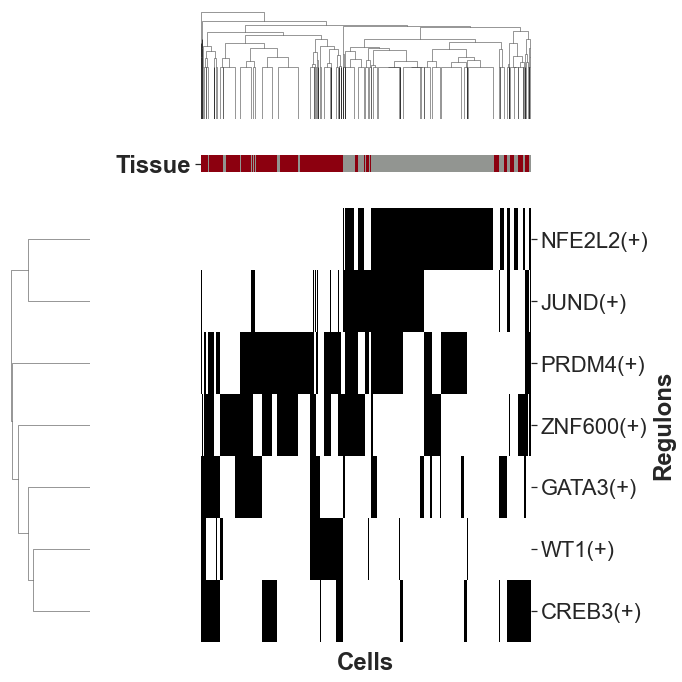

In [45]:
sns.set()
sns.set(font_scale=2.0)
sns.set_style("ticks", {"xtick.minor.size": 1, "ytick.minor.size": 0.1})
g = sns.clustermap(sbin_mtx.T, 
               col_colors=sauc_mtx.index.map(cell_id2cell_type_lut).map(cell_type_color_lut),
               cmap=bw_palette, figsize=(10,10), col_cluster=True)
g.ax_heatmap.set_xticklabels([])
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_xlabel('Cells', fontsize=24, weight='bold')
g.ax_heatmap.set_ylabel('Regulons', fontsize=24, weight='bold')
g.ax_col_colors.set_yticks([0.5])
g.ax_col_colors.set_yticklabels(['Tissue'], fontsize=24, weight='bold')
g.cax.set_visible(False)
g.fig.tight_layout()
g.fig.savefig('SCENIC/figures/clustermap_SMALL_7regulons_all_cells_tissue.png', dpi=400)